Could not find gas gamma, assuming 5./3.


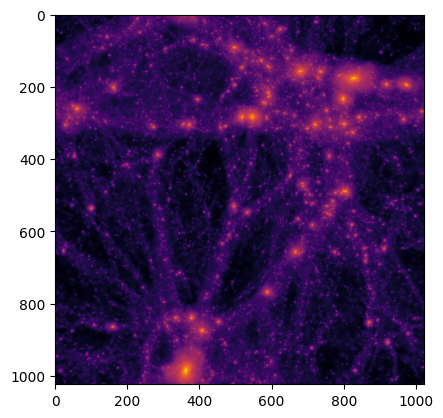

In [10]:
from swiftsimio import load
from swiftsimio.visualisation.projection import project_pixel_grid
from swiftsimio.visualisation.smoothing_length_generation import generate_smoothing_lengths

data = load("eagle_dmo_0000.hdf5")

# Generate smoothing lengths for the dark matter
data.dark_matter.smoothing_length = generate_smoothing_lengths(
    data.dark_matter.coordinates,
    data.metadata.boxsize,
    kernel_gamma=1.8,
    neighbours=57,
    speedup_fac=2,
    dimension=3,
)

# Project the dark matter mass
dm_mass = project_pixel_grid(
    # Note here that we pass in the dark matter dataset not the whole
    # data object, to specify what particle type we wish to visualise
    data=data.dark_matter,
    boxsize=data.metadata.boxsize,
    resolution=1024,
    project="masses",
    parallel=True,
    region=None
)

from matplotlib.pyplot import imsave
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
# Everyone knows that dark matter is purple
plt.imshow(LogNorm()(dm_mass),cmap="inferno")
# imsave("dm_mass_map.png", LogNorm()(dm_mass), cmap="inferno")

In [5]:
print(dm_mass)
dm_mass.shape

[[1237.6877 1198.6204 1158.5173 ... 1291.2909 1287.8853 1269.0139]
 [1243.1265 1201.4702 1156.2856 ... 1287.0763 1287.7864 1273.0438]
 [1239.618  1197.6931 1150.9124 ... 1274.3469 1278.0133 1266.9274]
 ...
 [1249.9622 1230.5547 1212.4968 ... 1288.8013 1283.8904 1268.9363]
 [1235.4055 1207.2749 1181.2258 ... 1293.6208 1284.3826 1262.6256]
 [1232.6532 1198.0802 1164.6084 ... 1293.3821 1285.8329 1263.6039]]


(1024, 1024)

In [11]:
import h5py
filename = "fof_output_0000.hdf5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    # get first object name/key; may or may NOT be a group
    print(list(f.keys()))
    a_group_key = list(f.keys())[3]
    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    print(data)
    for i in data:
        ds_obj = i
        ds_arr = f[a_group_key][i][()] 
        print(ds_obj)
        print(ds_arr)

['Code', 'Cosmology', 'GravityScheme', 'Groups', 'Header', 'InternalCodeUnits', 'Parameters', 'PhysicalConstants', 'Policy', 'RecordingTriggers', 'SubgridScheme', 'Units', 'UnusedParameters']
['Centres', 'GroupIDs', 'Masses', 'Sizes']
Centres
[[12.05070165  4.4189164   1.42812446]
 [ 2.17334685 10.07146459 12.46773849]
 [ 3.46670638  6.57126073  7.54545054]
 ...
 [ 3.63047311  8.93769503  7.42435804]
 [ 7.07742203 11.12197635  3.7536677 ]
 [12.19849553  4.77115105 12.18527228]]
GroupIDs
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 1

In [12]:
data = load("eagle_dmo_0000.hdf5")

Could not find gas gamma, assuming 5./3.


In [36]:

with h5py.File("eagle_dmo_0000.hdf5", "r") as f:
    print(list(f.keys()))
    a_group_key = list(f.keys())[8]
    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    print(data)
    # for i in data:
    #     ds_obj = i
    #     ds_arr = f[a_group_key][i][()] 
    #     print(ds_obj)
    #     print(ds_arr)

['Cells', 'Code', 'Cosmology', 'DMParticles', 'GravityScheme', 'Header', 'InternalCodeUnits', 'Parameters', 'PartType1', 'PhysicalConstants', 'Policy', 'RecordingTriggers', 'SubgridScheme', 'Units', 'UnusedParameters']
['Coordinates', 'FOFGroupIDs', 'Masses', 'ParticleIDs', 'Potentials', 'Softenings', 'Velocities']


In [12]:
dm_mass.shape

(1024, 1024)

In [13]:
dm_mass

array([[1237.6877, 1198.6204, 1158.5173, ..., 1291.2909, 1287.8853,
        1269.0139],
       [1243.1265, 1201.4702, 1156.2856, ..., 1287.0763, 1287.7864,
        1273.0438],
       [1239.618 , 1197.6931, 1150.9124, ..., 1274.3469, 1278.0133,
        1266.9274],
       ...,
       [1249.9622, 1230.5547, 1212.4968, ..., 1288.8013, 1283.8904,
        1268.9363],
       [1235.4055, 1207.2749, 1181.2258, ..., 1293.6208, 1284.3826,
        1262.6256],
       [1232.6532, 1198.0802, 1164.6084, ..., 1293.3821, 1285.8329,
        1263.6039]], dtype=float32)